# Linear Regression using Gradient Descent

## Import Statements

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

Get the x and y vectors from the sklearn dataset 'make_regression'. We choose number of samples as 100 and number of features as 1. Also some noise is added so that it is easier to visualize.

In [66]:
x, y = make_regression(n_features=1, n_samples=100, noise=8)

Now, a scatter plot is plotted of x and y.

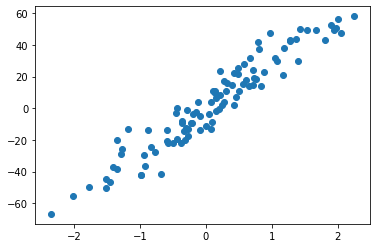

In [67]:
plt.scatter(x,y)

## The Linear Regression Class

In [205]:
class LinearRegression:
    
    def __init__(self, a=0.01):
        self.alpha = a
    
    alpha = 0
    err = []
    
    def online_gradient_descent(self, x, y, itr):
        '''
            This method updates the values of b0 and b1 after seeing each point.
            The initial values of b0 and b1 are considered to be 0. 
            Now for the passed number of iterations, the following steps are repeated:
                1. First calculate predicted values using the previous values
                2. Calculate mean squared error.
                3. update the values of b0 and b1 using the learning rate.
            Now plot the errors.
        '''
        b0 = 0.0
        b1 = 0.0
        for j in range(itr):
            pred = [0 for i in x]
            error = [0 for i in x]
            for i in range(len(x)):
                pred[i] = b0 + b1*x[i]
                error[i] = pred[i] - y[i]
                b0 = b0 - self.alpha * error[i]
                b1 = b1 - self.alpha * error[i] * x[i]
                #print(b0, b1)
            mean_err = np.array(error).mean()
            self.err.append(np.square(mean_err))
        
        pred = [(b0+b1*i) for i in x]
        plt.plot(x, pred, c='r')
        plt.scatter(x, y, c='y')
    
    def offline_gradient_descent(self, x, y, itr):
        '''
            In this method we update the values of m and c after each iteration, i.e.
            after seeing all the points.
        '''
        m = 0
        c = 0
        err1 = []
        n = len(x)
        for i in range(itr):
            y_pred = m*x+c
            d_m = (-2/n)*sum(x*(y-y_pred))
            d_c = (-2/n)*sum(y-y_pred)
            m = m - d_m * self.alpha
            c = c - d_c * self.alpha
            
            errors = np.square(np.subtract(y,y_pred))
            err1.append(errors.mean())
        plt.plot(err1)
        

### Plotting the 

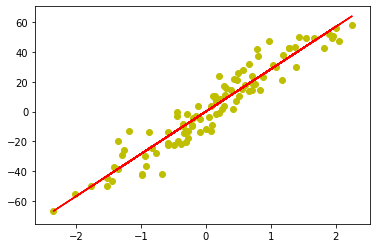

In [212]:
lr = LinearRegression()
lr.online_gradient_descent(x,y,50)

In [208]:
arr = np.array(lr.err)
arr = arr.flatten()

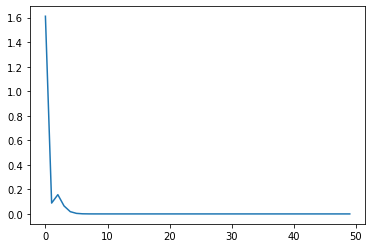

In [209]:
plt.plot(arr)

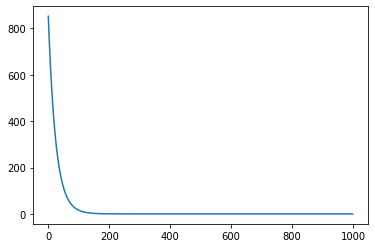

In [213]:
lr1 = LinearRegression(0.01)
lr1.offline_gradient_descent(x,y,1000)